## Masses

Un intento de reproducir las líneas en las que el periodo de recurrencia es el mismo en función de masa de la WD y la masa acretada *M_dot*, para hacerlo se usa el fit estándar de modelos de 2 parámetros para M_acc que es la misma que M_ign la masa que se requiere para la ignición, estos dos parámetros son α ∼(0.2-0.3) y n ∼(3-4)

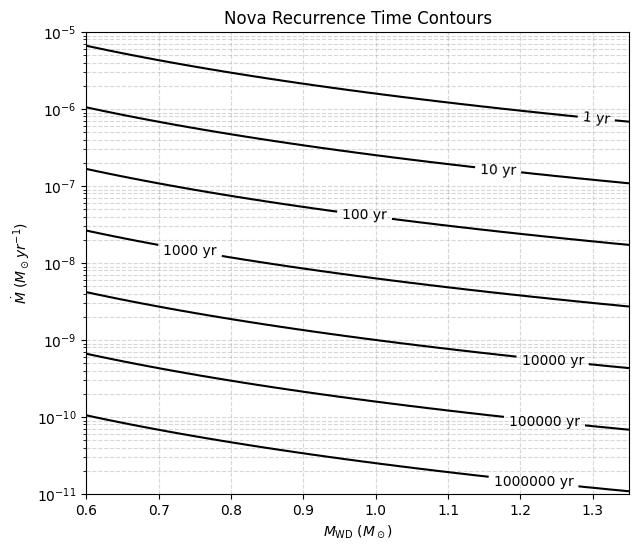

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M_wd= np.linspace(0.6,1.35,200)
M_dot= np.logspace(-11,-5,200)

M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot) #crea una grilla bidimensional con los datos

n = 3.5
alpha = 0.25
Macc = 1e-5 * (1.0 / M_wd_grid)**n * (1e-9 / M_dot_grid)**alpha    #calculada en base a ajustes en los papers

trec= Macc/M_dot_grid

plt.figure(figsize=(7,6))
cs = plt.contour(M_wd_grid, M_dot_grid, trec,
                 levels=[1, 10, 100, 1000, 1E4,1E5,1E6],
                 colors='black')
plt.clabel(cs, fmt='%d yr')

plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$\dot M\ (M_\odot yr^{-1})$')
plt.title('Nova Recurrence Time Contours')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

The analytical relation used in [Prialnik and Kovetz 1995](https://ui.adsabs.harvard.edu/abs/1995ApJ...445..789P/abstract) gives us:
$$M= \frac{M_{WD}}{M_{Ch}}$$


$$M_{acc}= \alpha10^{-4}M^{-7/3}(1-M^{4/3})^2$$

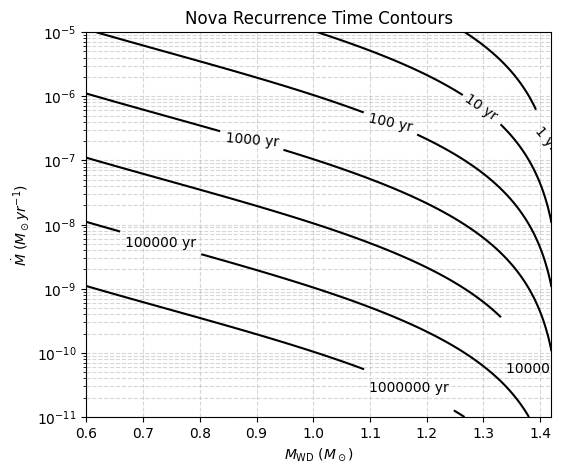

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M_wd= np.linspace(0.6,1.42,200)
M_dot= np.logspace(-11,-5,200)
M_ch= 1.44

M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot) #crea una grilla bidimensional con los datos
M= M_wd_grid/M_ch

Macc = 3*10**(-4) * M**(-7/3) * (1-M**(4/3))**2
trec= Macc/M_dot_grid

plt.figure(figsize=(6,5))
cs = plt.contour(M_wd_grid, M_dot_grid, trec,
                 levels=[1, 10, 100, 1000, 1E4,1E5,1E6],
                 colors='black')
plt.clabel(cs, fmt='%d yr')

plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$\dot M\ (M_\odot yr^{-1})$')
plt.title('Nova Recurrence Time Contours')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

And in order to analyze the recurrent novae scenario and the mass accretion needed for T-CrB we can set a narrow window for M_wd

con $\alpha=1$

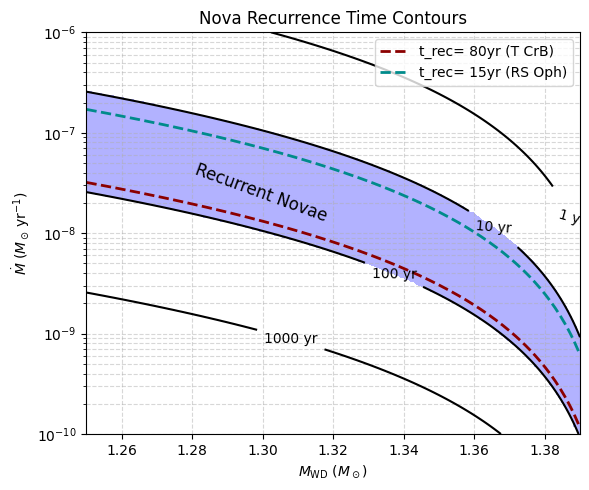

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M_wd = np.linspace(1.25, 1.39, 200)
M_dot = np.logspace(-10, -6, 200)
M_ch = 1.4

M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot)
M = M_wd_grid / M_ch

Macc = 10**(-4) * M**(-7/3) * (1 - M**(4/3))**2  # Accreted mass per outburst
trec = Macc / M_dot_grid                         # Recurrence time [yr]

#  base contours
plt.figure(figsize=(6, 5))
cs = plt.contour(M_wd_grid, M_dot_grid, trec,
                 levels=[1, 10, 100, 1000],
                 colors='black')
plt.clabel(cs, fmt='%d yr')

# Highlight Recurrent Nova Region (10–100 yr)
mask = (trec >= 10) & (trec <= 100)
plt.contourf(M_wd_grid, M_dot_grid, mask, levels=[0.5, 1], colors='blue', alpha=0.3)

# highliht T CrB and RS-oph
trec_TCrB = 80.0
trec_RSOph = 15.0

M_vals = M_wd / M_ch
Macc_vals = 10**(-4) * M_vals**(-7/3) * (1 - M_vals**(4/3))**2
Mdot_TCrB = Macc_vals / trec_TCrB
Mdot_RSOph = Macc_vals / trec_RSOph

plt.plot(M_wd, Mdot_TCrB, color='darkred', linestyle='--', linewidth=2,
         label='t_rec= 80yr (T CrB)')
plt.plot(M_wd, Mdot_RSOph, color='darkcyan', linestyle='--', linewidth=2,
         label='t_rec= 15yr (RS Oph)')

# plot settings
plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.text(1.28,1.3*1E-8,'Recurrent Novae',rotation=-20,fontsize=12)
plt.ylabel(r'$\dot M\ (M_\odot\,{\rm yr^{-1}})$')
plt.title('Nova Recurrence Time Contours', fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

con $\alpha=3$

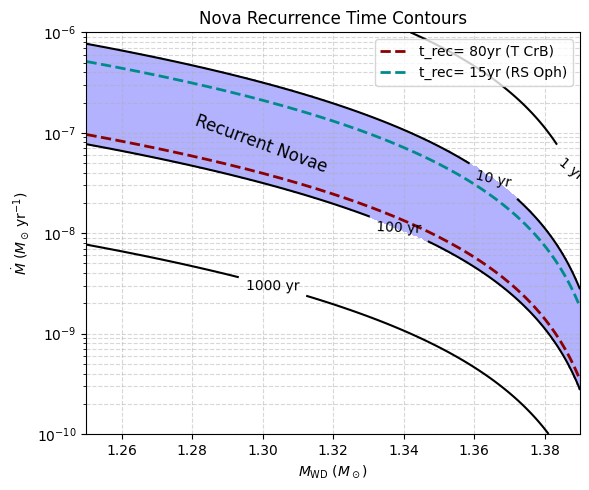

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M_wd = np.linspace(1.25, 1.39, 200)
M_dot = np.logspace(-10, -6, 200)
M_ch = 1.4

M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot)
M = M_wd_grid / M_ch

Macc = 3*10**(-4) * M**(-7/3) * (1 - M**(4/3))**2  # Accreted mass per outburst
trec = Macc / M_dot_grid                         # Recurrence time [yr]

#  base contours
plt.figure(figsize=(6, 5))
cs = plt.contour(M_wd_grid, M_dot_grid, trec,
                 levels=[1, 10, 100, 1000],
                 colors='black')
plt.clabel(cs, fmt='%d yr')

# Highlight Recurrent Nova Region (10–100 yr)
mask = (trec >= 10) & (trec <= 100)
plt.contourf(M_wd_grid, M_dot_grid, mask, levels=[0.5, 1], colors='blue', alpha=0.3)

# highliht T CrB and RS-oph
trec_TCrB = 80.0
trec_RSOph = 15.0

M_vals = M_wd / M_ch
Macc_vals = 3*10**(-4) * M_vals**(-7/3) * (1 - M_vals**(4/3))**2
Mdot_TCrB = Macc_vals / trec_TCrB
Mdot_RSOph = Macc_vals / trec_RSOph

plt.plot(M_wd, Mdot_TCrB, color='darkred', linestyle='--', linewidth=2,
         label='t_rec= 80yr (T CrB)')
plt.plot(M_wd, Mdot_RSOph, color='darkcyan', linestyle='--', linewidth=2,
         label='t_rec= 15yr (RS Oph)')

# plot settings
plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.text(1.28,4*1E-8,'Recurrent Novae',rotation=-20,fontsize=12)
plt.ylabel(r'$\dot M\ (M_\odot\,{\rm yr^{-1}})$')
plt.title('Nova Recurrence Time Contours', fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()







T CrB Intercepts (calc): [3.14757024e-08 1.40028484e-09]
RS Oph Intercepts (calc): [1.25902810e-07 5.60113936e-09]


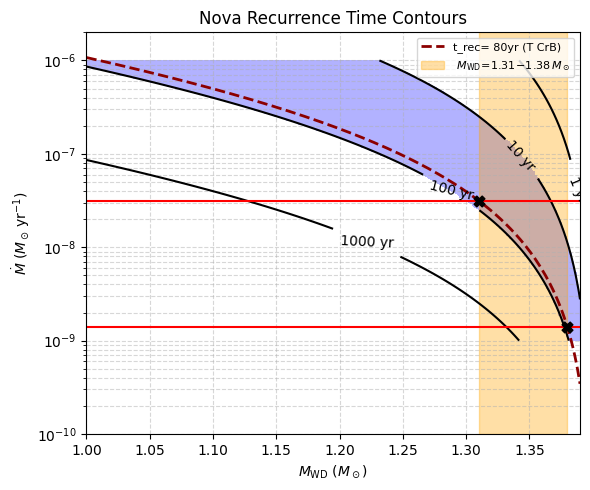

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Grids
M_ch = 1.4
M_wd = np.linspace(1, 1.39, 200)
M_dot = np.logspace(-9, -6, 200)
M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot)

# Physics Functions
def get_Macc(M_wd_val):
    M = M_wd_val / M_ch
    # Macc formula from user code
    return 3*10**(-4) * M**(-7/3) * (1 - M**(4/3))**2

Macc_grid = get_Macc(M_wd_grid)
trec_grid = Macc_grid / M_dot_grid

# Recurrence Times
trec_TCrB = 80.0
trec_RSOph = 20.0

# Calculate Lines
Macc_line = get_Macc(M_wd)
Mdot_TCrB = Macc_line / trec_TCrB
Mdot_RSOph = Macc_line / trec_RSOph

# Calculate Intercepts for T CrB and RS oph
m_inter = np.array([1.31, 1.38])
macc_inter = get_Macc(m_inter)
mdot_inter_TCrB = macc_inter / trec_TCrB
mdot_inter_RSOph = macc_inter / trec_RSOph

print("T CrB Intercepts (calc):", mdot_inter_TCrB)
print("RS Oph Intercepts (calc):", mdot_inter_RSOph)

# Plotting
plt.figure(figsize=(6, 5))

# Contours
cs = plt.contour(M_wd_grid, M_dot_grid, trec_grid, levels=[1, 10, 100, 1000], colors='black')
plt.clabel(cs, fmt='%d yr')

# Region
mask = (trec_grid >= 10) & (trec_grid <= 100)
plt.contourf(M_wd_grid, M_dot_grid, mask, levels=[0.5, 1], colors='blue', alpha=0.3)

# Lines
plt.plot(M_wd, Mdot_TCrB, color='darkred', linestyle='--', linewidth=2, label='t_rec= 80yr (T CrB)')
#plt.plot(M_wd, Mdot_RSOph, color='darkcyan', linestyle='--', linewidth=2, label='t_rec= 15yr (RS Oph)')

# Orange Span
plt.axvspan(1.31, 1.38, color='orange', alpha=0.35, label=r' $M_{\rm WD}\!=\!1.31\!-\!1.38\,M_\odot$')

# T CrB Markers
plt.axhline(mdot_inter_TCrB[0], color='red')
plt.axhline(mdot_inter_TCrB[1], color='red')
plt.scatter(1.31, mdot_inter_TCrB[0], color='black', marker='X', s=60, zorder=3)
plt.scatter(1.38, mdot_inter_TCrB[1], color='black', marker='X', s=60, zorder=3)

#  RS Oph Markers
# Using the calculated values for exact intersection
#plt.axhline(mdot_inter_RSOph[0], color='red', linestyle=':', alpha=0.8)
#plt.axhline(mdot_inter_RSOph[1], color='red', linestyle=':', alpha=0.8)
#plt.scatter(1.31, mdot_inter_RSOph[0], color='black', marker='X', s=60, zorder=3)
#plt.scatter(1.38, mdot_inter_RSOph[1], color='black', marker='X', s=60, zorder=3)

plt.ylim(1E-10, 2E-6)
plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$\dot M\ (M_\odot\,{\rm yr^{-1}})$')
plt.title('Nova Recurrence Time Contours', fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()

#plt.savefig('nova_plot.png')

T CrB Intercepts (calc): [3.14757024e-08 1.40028484e-09]
RS Oph Intercepts (calc): [9.89175799e-07 0.00000000e+00]


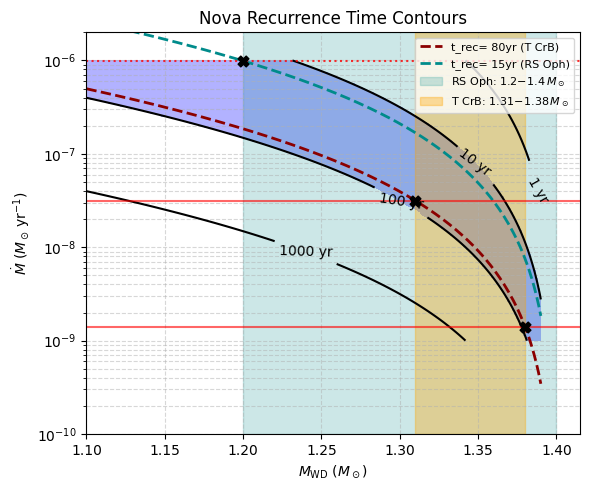

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Grids
M_ch = 1.4
M_wd = np.linspace(1.1, 1.39, 200)
M_dot = np.logspace(-9, -6, 200)
M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot)

# Physics Functions
def get_Macc(M_wd_val):
    M = M_wd_val / M_ch
    return 3*10**(-4) * M**(-7/3) * (1 - M**(4/3))**2

Macc_grid = get_Macc(M_wd_grid)
trec_grid = Macc_grid / M_dot_grid

# Recurrence Times
trec_TCrB = 80.0
trec_RSOph = 15.0

# Calculate Lines
Macc_line = get_Macc(M_wd)
Mdot_TCrB = Macc_line / trec_TCrB
Mdot_RSOph = Macc_line / trec_RSOph

# --- INTERCEPTS CALCULATION ---

# T CrB (Original range: 1.31 - 1.38)
masses_TCrB = np.array([1.31, 1.38])
macc_TCrB = get_Macc(masses_TCrB)
mdot_inter_TCrB = macc_TCrB / trec_TCrB

# RS Oph (New requested range: 1.2 - 1.4)
masses_RSOph = np.array([1.2, 1.4])
macc_RSOph = get_Macc(masses_RSOph)
mdot_inter_RSOph = macc_RSOph / trec_RSOph

print("T CrB Intercepts (calc):", mdot_inter_TCrB)
print("RS Oph Intercepts (calc):", mdot_inter_RSOph)

# --- PLOTTING ---
plt.figure(figsize=(6, 5))

# Contours
cs = plt.contour(M_wd_grid, M_dot_grid, trec_grid, levels=[1, 10, 100, 1000], colors='black')
plt.clabel(cs, fmt='%d yr')

# Highlight Recurrent Nova Region (10–100 yr)
mask = (trec_grid >= 10) & (trec_grid <= 100)
plt.contourf(M_wd_grid, M_dot_grid, mask, levels=[0.5, 1], colors='blue', alpha=0.3)

# Plot Recurrence Lines
plt.plot(M_wd, Mdot_TCrB, color='darkred', linestyle='--', linewidth=2, label='t_rec= 80yr (T CrB)')
plt.plot(M_wd, Mdot_RSOph, color='darkcyan', linestyle='--', linewidth=2, label='t_rec= 15yr (RS Oph)')

# Spans (Ranges)
# RS Oph Span (Darkcyan) - Plotting first so T CrB (smaller) sits on top if overlaps, or vice versa.
# Using alpha, so order matters slightly for color mixing.
plt.axvspan(masses_RSOph[0], masses_RSOph[1], color='darkcyan', alpha=0.2, label=r'RS Oph: $1.2\!-\!1.4\,M_\odot$')
# T CrB Span (Orange)
plt.axvspan(1.31, 1.38, color='orange', alpha=0.35, label=r'T CrB: $1.31\!-\!1.38\,M_\odot$')

# Markers and Horizontal Lines

# T CrB Intercepts
plt.axhline(mdot_inter_TCrB[0], color='red', linestyle='-', alpha=0.6) # Made slightly transparent to not clutter
plt.axhline(mdot_inter_TCrB[1], color='red', linestyle='-', alpha=0.6)
plt.scatter(masses_TCrB, mdot_inter_TCrB, color='black', marker='X', s=60, zorder=3)

# RS Oph Intercepts
plt.axhline(mdot_inter_RSOph[0], color='red', linestyle=':', alpha=0.8)
plt.axhline(mdot_inter_RSOph[1], color='red', linestyle=':', alpha=0.8)
plt.scatter(masses_RSOph, mdot_inter_RSOph, color='black', marker='X', s=60, zorder=3)

# Settings
plt.ylim(1E-10, 2E-6)
plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$\dot M\ (M_\odot\,{\rm yr^{-1}})$')
plt.title('Nova Recurrence Time Contours', fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()

#plt.savefig('nova_plot_rsoph_range.png')

T CrB Intercepts (calc): [3.14757024e-08 1.40028484e-09]
RS Oph Intercepts (calc): [1.25902810e-07 5.60113936e-09]


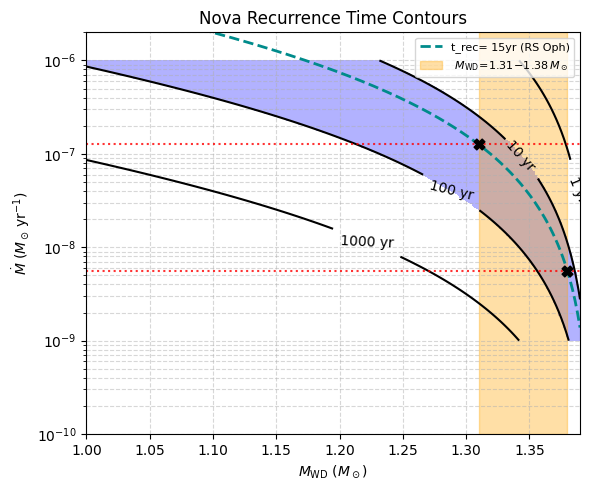

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Grids
M_ch = 1.4
M_wd = np.linspace(1, 1.39, 200)
M_dot = np.logspace(-9, -6, 200)
M_wd_grid, M_dot_grid = np.meshgrid(M_wd, M_dot)

# Physics Functions
def get_Macc(M_wd_val):
    M = M_wd_val / M_ch
    # Macc formula from user code
    return 3*10**(-4) * M**(-7/3) * (1 - M**(4/3))**2

Macc_grid = get_Macc(M_wd_grid)
trec_grid = Macc_grid / M_dot_grid

# Recurrence Times
trec_TCrB = 80.0
trec_RSOph = 20.0

# Calculate Lines
Macc_line = get_Macc(M_wd)
Mdot_TCrB = Macc_line / trec_TCrB
Mdot_RSOph = Macc_line / trec_RSOph

# Calculate Intercepts for T CrB and RS oph
m_inter = np.array([1.31, 1.38])
macc_inter = get_Macc(m_inter)
mdot_inter_TCrB = macc_inter / trec_TCrB
mdot_inter_RSOph = macc_inter / trec_RSOph

print("T CrB Intercepts (calc):", mdot_inter_TCrB)
print("RS Oph Intercepts (calc):", mdot_inter_RSOph)

# Plotting
plt.figure(figsize=(6, 5))

# Contours
cs = plt.contour(M_wd_grid, M_dot_grid, trec_grid, levels=[1, 10, 100, 1000], colors='black')
plt.clabel(cs, fmt='%d yr')

# Region
mask = (trec_grid >= 10) & (trec_grid <= 100)
plt.contourf(M_wd_grid, M_dot_grid, mask, levels=[0.5, 1], colors='blue', alpha=0.3)

# Lines
#plt.plot(M_wd, Mdot_TCrB, color='darkred', linestyle='--', linewidth=2, label='t_rec= 80yr (T CrB)')
plt.plot(M_wd, Mdot_RSOph, color='darkcyan', linestyle='--', linewidth=2, label='t_rec= 15yr (RS Oph)')

# Orange Span
plt.axvspan(1.31, 1.38, color='orange', alpha=0.35, label=r' $M_{\rm WD}\!=\!1.31\!-\!1.38\,M_\odot$')

# T CrB Markers
#plt.axhline(mdot_inter_TCrB[0], color='red')
#plt.axhline(mdot_inter_TCrB[1], color='red')
#plt.scatter(1.31, mdot_inter_TCrB[0], color='black', marker='X', s=60, zorder=3)
#plt.scatter(1.38, mdot_inter_TCrB[1], color='black', marker='X', s=60, zorder=3)

#  RS Oph Markers
# Using the calculated values for exact intersection
plt.axhline(mdot_inter_RSOph[0], color='red', linestyle=':', alpha=0.8)
plt.axhline(mdot_inter_RSOph[1], color='red', linestyle=':', alpha=0.8)
plt.scatter(1.31, mdot_inter_RSOph[0], color='black', marker='X', s=60, zorder=3)
plt.scatter(1.38, mdot_inter_RSOph[1], color='black', marker='X', s=60, zorder=3)

plt.ylim(1E-10, 2E-6)
plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$\dot M\ (M_\odot\,{\rm yr^{-1}})$')
plt.title('Nova Recurrence Time Contours', fontsize=12)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()

#plt.savefig('nova_plot.png')

##Conclusion
adoptamos $\alpha=3$ (que es un parámetro libre de ajuste) porque ajusta mejor para reproducir los graficos de Wolf.et.al+2013 y Chomiuk.et.al+2021

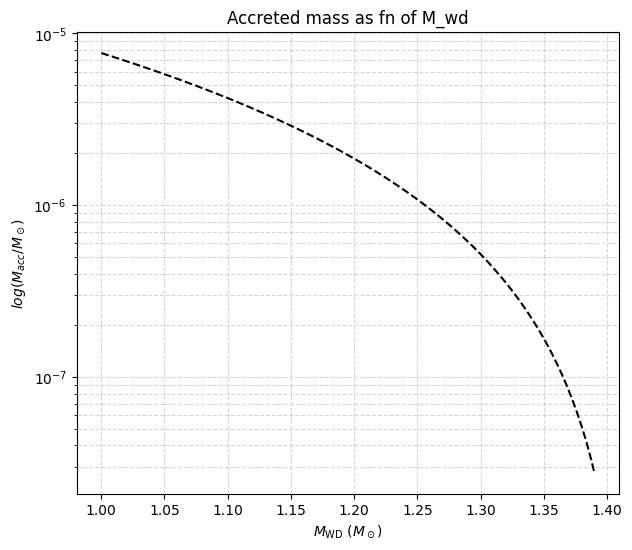

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(M_wd,Macc[0],c='black',linestyle='dashed')

plt.yscale('log')
plt.xlabel(r'$M_{\rm WD}\ (M_\odot)$')
plt.ylabel(r'$log (M_{acc}/M_\odot)$')
plt.title('Accreted mass as fn of M_wd')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

Also an important plot is m_ej/m_acc

In [ ]:
print(min(Macc[0]),max(Macc[0]))

2.7603908166412504e-08 7.68639391484831e-06


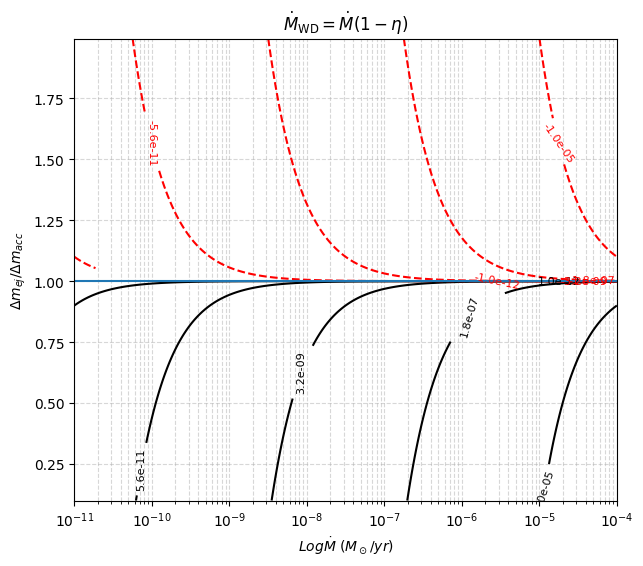

In [ ]:
M_ej= np.logspace(-8,-3.7,200) # considering recurrent and classical novae
Macc2= np.logspace(-7,-4,200)
M_dot= np.logspace(-11,-4,200)
eta= M_ej/Macc2

Mdot_grid, eta_grid = np.meshgrid(M_dot, eta)
M_wd_dot = Mdot_grid * (1 - eta_grid)


mask_pos = M_wd_dot >= 0
mask_neg = M_wd_dot < 0


plt.figure(figsize=(7,6))
# Contornos positivos (ganancia de masa)
cs1 = plt.contour(Mdot_grid, eta_grid, M_wd_dot,
                  levels=np.logspace(-12, -5, 5),
                  colors='black', linestyles='solid')
plt.clabel(cs1, fmt='%.1e', fontsize=8)

# Contornos negativos (pérdida de masa)
cs2 = plt.contour(Mdot_grid, eta_grid, -M_wd_dot,
                  levels=np.logspace(-12, -5, 5),
                  colors='red', linestyles='dashed')
plt.clabel(cs2, fmt='-%.1e', fontsize=8)
plt.axhline( y= 1)
plt.xscale('log')
plt.xlabel(r'$Log{\dot M}\ (M_\odot/yr)$')
plt.ylabel(r'$\Delta m_{ej}/\Delta m_{acc}$')
plt.title(r'$\dot M_{\rm WD} = \dot M(1 - \eta)$')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

In [ ]:
print(min(M_wd_dot[-1]),max(M_wd_dot[-1]))

-9.952623149688787e-05 -9.952623149688785e-12


## Radius (Rdec)

Para el radio de desaceleración resolvemos la integral usando scipy

In [ ]:
from scipy.integrate import quad

def integrand(r, R0, beta):

  return 1.0 / (1.0-R0/(2.0*r))**beta


def  integral_def(Rs,R_dec,R0,beta):
  integral, error = quad(integrand, Rs, R_dec, args=(R0,beta))
  return integral, error


R0 = 2.0
R_star = 3.0
R_dec = 8.0

for beta in [0.6, 1.0, 1.5]:
    val, err = integral_def(R_star, R_dec, R0, beta)
    print(f"beta={beta:.1f} -> I={val:.6f} (error estimado={err:.2e})")

beta=0.6 -> I=5.714137 (error estimado=8.29e-13)
beta=1.0 -> I=6.252763 (error estimado=3.30e-12)
beta=1.5 -> I=7.006704 (error estimado=1.32e-11)


Pero esto sólo me dice que la masa depende de los límites para dar un cierto valor, lo cual al final lo me permite despejar nada, sólo nos permite jugar con unas variables en función de las otras en base a: $$\frac{\dot M R_0}{v_∞} I=\frac{2E_0}{v_0^2}$$

Lo interesante sería encontrar un valor para Rdec de forma análitica pero como la integral depende de betea nos lleva a bien a soluciones con funciones hipergeométrics o bien a algunas soluciones logaritmicas, pero podemos usar un ratio de R_dec/R_star en función de lo que está al otro lado de la integral

In [ ]:
#primero vamos con las unidades tal cual y luego precisamos, lo bueno es que R_dec/R_star es adimensional
# y eta= (M0*v_inf)/(M_dot*R_star) también lo es so, calculemos:
from scipy.integrate import quad
import numpy as np

R_star= 54* 6.96*10**8 # todo en m
un_pc= 3.086*10**16
R_dec= np.linspace(un_pc*1E-6, un_pc*1E-3,5) #tomamos 50 values from 1pc*1E-6 to 1pc*1E-3

# R0 is likely in solar radii based on the context, let's convert to meters
R0_m = 2.0 * 6.96 * 10**8 # in meters

M_d= np.logspace(-11,-6,5)
M_dot= M_d/(3.15*10**7) #para que este en M_sun/ segundos
v_inf= 3E4 # en m/s
Mo= 10E-8

eta= Mo*v_inf/(M_dot*R_star)

def integrand(r, R0, beta):
  base = 1.0 - R0/(2.0*r)
  # Add a small epsilon to the base for non-integer beta to avoid negative values due to float errors near singularity
  epsilon = 1e-15
  if not np.isclose(beta, round(beta)): # Check if beta is not an integer
      base += epsilon
  return 1.0 / (base)**beta


def  integral_def(Rs,R_dec_val,R0_val,beta):
  # Check if the integration range is valid (both limits > R0/2)
  if Rs <= R0_val/2.0 or R_dec_val <= R0_val/2.0:
      # print(f"Integration range includes values <= R0/2 for R_dec={R_dec_val:.6e}. Cannot compute real integral.")
      return np.nan, np.nan # Return NaN for invalid range

  integral, error = quad(integrand, Rs, R_dec_val, args=(R0_val,beta))
  return integral, error


for beta in [0.3,0.6, 0.9, 1.0]:
    print(f"beta={beta:.1f}")
    for r_dec_val in R_dec:
        val, err = integral_def(R_star, r_dec_val, R0_m, beta)
        if not np.isnan(val):
            print(f"  R_dec={r_dec_val:.6e} -> I={val:.6f} (error estimado={err:.2e})")
        else:
            print(f"  R_dec={r_dec_val:.6e} -> Integration range invalid.")

beta=0.3
  R_dec=3.086000e+10 -> I=-6765714545.274677 (error estimado=7.51e-05)
  R_dec=7.738145e+12 -> I=7701675867502.204102 (error estimado=2.92e+02)
  R_dec=1.544543e+13 -> I=15409105185959.117188 (error estimado=2.15e+05)
  R_dec=2.315272e+13 -> I=23116474710001.886719 (error estimado=1.79e+04)
  R_dec=3.086000e+13 -> I=30823819709449.664062 (error estimado=2.15e+05)
beta=0.6
  R_dec=3.086000e+10 -> I=-6807688742.407482 (error estimado=7.56e-05)
  R_dec=7.738145e+12 -> I=7702791903523.879883 (error estimado=6.02e+02)
  R_dec=1.544543e+13 -> I=15410365543248.376953 (error estimado=6.05e+02)
  R_dec=2.315272e+13 -> I=23117819592274.601562 (error estimado=3.67e+04)
  R_dec=3.086000e+13 -> I=30825224591640.480469 (error estimado=4.41e+05)
beta=0.9
  R_dec=3.086000e+10 -> I=-6849924212.971748 (error estimado=7.60e-05)
  R_dec=7.738145e+12 -> I=7703909111366.301758 (error estimado=9.31e+02)
  R_dec=1.544543e+13 -> I=15411627075170.597656 (error estimado=9.36e+02)
  R_dec=2.315272e+13 ->

In [ ]:
#primero vamos con las unidades tal cual y luego precisamos, lo bueno es que R_dec/R_star es adimensional
# y eta= (M0*v_inf)/(M_dot*R_star) también lo es so, calculemos:
from scipy.integrate import quad
import numpy as np

R_star= 54* 6.96*10**8 # todo en m
un_pc= 3.086*10**16
R_dec= np.linspace(un_pc*1E-6, un_pc*1E-3,10) #tomamos 50 valores desde 1pc*1E-6 hasta 1pc*1E-3

ratio= R_dec/R_star


M_d= np.logspace(-11,-6,10)
M_dot= M_d/(3.15*10**7) #para que este en M_sun/ segundos
v_inf= 3E4 # en m/s
Mo= 10E-8

eta= Mo*v_inf/(M_dot*R_star)


# Integrand in terms of x (dimensionless)
def integrand(x, beta):
  # Check if the base is negative for non-integer beta and add epsilon
  base = 1.0 - 1/x
  epsilon = 1e-15
  if not np.isclose(beta, round(beta)): # Check if beta is not an integer
      # Ensure x is not too close to 1 from the left, where base becomes negative
      if x < 1.0 and abs(base) < epsilon:
          base = epsilon # Avoid negative base near singularity
      elif x < 1.0:
           # For x < 1, base is negative. If beta is not integer, result is complex.
           # This case should ideally not be in the integration range [1, ratio]
           pass # Let quad handle if it samples here, but expect issues if beta is non-integer and ratio < 1

  return 1.0 / (base)**beta


def  integral_def(ratio_val,beta):
  # Integrate from 1 to ratio_val
  lower_limit = 1.0
  upper_limit = ratio_val

  # Check if the upper limit is less than the lower limit, which would make the integral range invalid for quad
  if upper_limit < lower_limit:
      print(f"  Invalid integration range: upper limit ({upper_limit:.6f}) < lower limit ({lower_limit:.6f}) for ratio={ratio_val:.6f}. Skipping.")
      return np.nan, np.nan

  integral, error = quad(integrand, lower_limit, upper_limit, args=(beta))
  return integral, error


for beta in [0.6, 1.0, 1.5]:
    print(f"beta={beta:.1f}")
    for r in ratio:
        val, err = integral_def(r, beta)
        if not np.isnan(val):
            print(f"  ratio={r:.6f} -> I={val:.6f} (error estimado={err:.2e})")

beta=0.6
  Invalid integration range: upper limit (0.821094) < lower limit (1.000000) for ratio=0.821094. Skipping.
  ratio=91.962537 -> I=95.460623 (error estimado=4.95e-07)
  ratio=183.103980 -> I=187.017887 (error estimado=8.78e-07)
  ratio=274.245424 -> I=278.402586 (error estimado=1.05e-06)
  ratio=365.386867 -> I=369.716627 (error estimado=8.74e-07)
  ratio=456.528310 -> I=460.991949 (error estimado=7.47e-07)
  ratio=547.669753 -> I=552.242781 (error estimado=1.05e-06)
  ratio=638.811196 -> I=643.476711 (error estimado=1.01e-06)
  ratio=729.952639 -> I=734.698271 (error estimado=8.77e-07)
  ratio=821.094083 -> I=825.910382 (error estimado=3.06e-06)
beta=1.0
  Invalid integration range: upper limit (0.821094) < lower limit (1.000000) for ratio=0.821094. Skipping.
  ratio=91.962537 -> I=132.156448 (error estimado=8.52e+00)
  ratio=183.103980 -> I=223.947762 (error estimado=9.64e+00)
  ratio=274.245424 -> I=314.770246 (error estimado=9.09e+00)
  ratio=365.386867 -> I=405.770469 (err

/tmp/ipython-input-2131376969.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(integrand, lower_limit, upper_limit, args=(beta))
/tmp/ipython-input-2131376969.py:48: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, error = quad(integrand, lower_limit, upper_limit, args=(beta))


  ratio=729.952639 -> I=770.560563 (error estimado=9.23e+00)
  ratio=821.094083 -> I=861.828937 (error estimado=9.45e+00)
beta=1.5
  Invalid integration range: upper limit (0.821094) < lower limit (1.000000) for ratio=0.821094. Skipping.
  ratio=91.962537 -> I=98.303532 (error estimado=1.02e-06)
  ratio=183.103980 -> I=190.488231 (error estimado=2.14e-06)
  ratio=274.245424 -> I=282.239049 (error estimado=3.58e-06)
  ratio=365.386867 -> I=373.812604 (error estimado=2.95e-06)
  ratio=456.528310 -> I=465.289115 (error estimado=3.30e-06)
  ratio=547.669753 -> I=556.704276 (error estimado=3.53e-06)
  ratio=638.811196 -> I=648.077113 (error estimado=2.17e-06)
  ratio=729.952639 -> I=739.418980 (error estimado=2.86e-06)
  ratio=821.094083 -> I=830.737195 (error estimado=7.08e-06)


Draft

In [ ]:
import sympy as sp

# Definimos símbolos
r, R0, R_star, R_dec = sp.symbols('r R0 R_star R_dec', positive=True, real=True)

def integral_beta(beta_value):
    integrand = 1 / (1 - R0/(2*r))**beta_value
    I_def = sp.integrate(integrand, (r, R_star, R_dec))
    return sp.simplify(I_def)

# Casos concretos
I_beta_05 = integral_beta(sp.Rational(1,2))
I_beta_1  = integral_beta(1)
I_beta_2  = integral_beta(2)

# Mostrar como string crudo
print("β=0.5 (raw string):", str(I_beta_05))
print("\nβ=1 (raw string):", str(I_beta_1))
print("\nβ=2 (raw string):", str(I_beta_2))


β=0.5 (raw string): Piecewise(((sqrt(2)*sqrt(R_dec)*(-R0 + 2*R_dec)*sqrt(-R0 + 2*Min(R_dec, Max(R0/2, R_star))) + sqrt(-R0 + 2*R_dec)*sqrt(-R0 + 2*Min(R_dec, Max(R0/2, R_star)))*(R0*acosh(sqrt(2)*sqrt(R_dec)/sqrt(R0)) - R0*acosh(sqrt(2)*sqrt(Min(R_dec, Max(R0/2, R_star)))/sqrt(R0)) + I*R0*asin(sqrt(2)*sqrt(R_star)/sqrt(R0)) - I*R0*asin(sqrt(2)*sqrt(Min(R_dec, Max(R0/2, R_star)))/sqrt(R0)) - sqrt(2)*I*sqrt(R_star)*sqrt(R0 - 2*R_star) + sqrt(2)*I*sqrt(R0 - 2*Min(R_dec, Max(R0/2, R_star)))*sqrt(Min(R_dec, Max(R0/2, R_star)))) + sqrt(2)*sqrt(-R0 + 2*R_dec)*(R0 - 2*Min(R_dec, Max(R0/2, R_star)))*sqrt(Min(R_dec, Max(R0/2, R_star))))/(2*sqrt(-R0 + 2*R_dec)*sqrt(-R0 + 2*Min(R_dec, Max(R0/2, R_star)))), R_dec > R_star), ((sqrt(2)*sqrt(R_star)*sqrt(-R0 + 2*Min(R_star, Max(R0/2, R_dec)))*(R0 - 2*R_star) + sqrt(-R0 + 2*R_star)*sqrt(-R0 + 2*Min(R_star, Max(R0/2, R_dec)))*(-R0*acosh(sqrt(2)*sqrt(R_star)/sqrt(R0)) + R0*acosh(sqrt(2)*sqrt(Min(R_star, Max(R0/2, R_dec)))/sqrt(R0)) - I*R0*asin(sqrt(2)*sq

In [ ]:
I_beta_1

R0*log(-R0 + 2*R_dec)/2 - R0*log(-R0 + 2*R_star)/2 + R_dec - R_star

In [ ]:
I_beta_2

(R0**2*(-R0 + 2*R_dec) + R0**2*(R0 - 2*R_star) + 2*(R0 - 2*R_dec)*(R0 - 2*R_star)*(R0*log(-R0 + 2*R_dec) - R0*log(-R0 + 2*R_star) + R_dec - R_star))/(2*(R0 - 2*R_dec)*(R0 - 2*R_star))

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Definimos símbolos
x, b = sp.symbols('x b', real=True, positive=True)

# Expresión simbólica
expr = ((1 - 2*x)**b * x * sp.hyper([b, 1+b], [2+b], 2*x)) / ((1+b)*(1 - 1/(2*x))**b)

# Lambdify usando mpmath
f_lambd = sp.lambdify((x, b), expr, modules="mpmath")

# Función de graficado
def plot_func(b=1.0):
    plt.clf()
    xs = np.linspace(0.1, 0.49, 300)
    ys = [float(sp.re(f_lambd(xx, b))) for xx in xs]  # convertir a float

    plt.plot(xs, ys, lw=2, label=fr"$b={b}$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Función con hipergeométrica 2F1")
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider interactivo
interact(plot_func, b=(0.5, 2.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='b', max=2.0, min=0.5), Output()), _dom_classes=('wid…

## Luminosity

Debemos poder calcular una relación similar usando log(Lmax)/Lsolar

In [ ]:
G= 6.67*10e-8
c= 3*10e11 # in cm

kappa= np.linspace(1,1,1) #valores por definir con la literatura

Ledd= (4*np.pi*c*G*M_wd)/kappa

## En T-CrB the companion fills its roche lobe? and what is the value estimated for M_BHL as mass transfer mechanism?

In [ ]:
AU= 1.496*1E11 # en m

G= 6.67*1E-11 # en mks
P= (227*86400) #en s
Msum1= 1.729*1.989*10**30 # en kg
Msum2= 2.06*1.989*10**30  # en kg
R_sun= 6.957e8  # en m
q1= 0.3198
q2= 0.4927

a1 = ((P**2 * G * Msum1) / (4 * (np.pi**2)))**(1/3) # en m
a2 = ((P**2 * G * Msum2) / (4 * (np.pi**2)))**(1/3) # en m

R_rl1= (a1*0.49*q1**(2/3))/(0.6*q1**(2/3)+np.log(1+q1**(1/3)))
R_rl2= (a2*0.49*q2**(2/3))/(0.6*q2**(2/3)+np.log(1+q2**(1/3)))

print(a1/AU,a2/AU)
print(R_rl1,R_rl2)


0.8739637727618937 0.9265115546159752
37371823349.91789 44298878076.119995


calculo rápido para la separación orbital de RS Oph

In [ ]:
seconds_day= 60*60*24
Msun= 1.989*10**30

P_RS= 453.6*seconds_day
Msum1= (1.2*Msun )+(0.68*Msun)
Msum2= (1.4*Msun )+(0.8*Msun)


a_RS1= ((P_RS**2 * G * Msum1) / (4 * (np.pi**2)))**(1/3) # en m}
a_RS2= ((P_RS**2 * G * Msum2) / (4 * (np.pi**2)))**(1/3) # en m}
AU= 1.496*10**11 # en m

print(a_RS1/AU)
print(a_RS2/AU)


1.425758081410045
1.5024526213633407


In [ ]:
# a de T CrB usando el dato que dan en hinkle et al+2025 de asin(i) (el valor es un poco menor a las estimaciones con a=(P^2 ...)^1/3)
i= np.deg2rad(50) # dan varios valores pero este es el de distance as free param (también dan 67°)
asin_i= 75.37*1E6 # km
a_TCrB= asin_i/ np.sin(i)
print(a_TCrB/(AU/1000))

0.6576774558621247


In [ ]:
# a de RS oph usando el valor de asin(i) de Brandi et al+2009
i= np.deg2rad(49)         #dan i entre 49° y 52°
asin_i= 0.81    # AU    también dan valores que oscilan mucho (0.43 mas bajo y 0.81 mel más alto)
a_RS= asin_i/ np.sin(i)
print(a_RS)

1.0732605246125373


In [ ]:
R_rg_free= 54*R_sun
R_rg_gaia= 63.4*R_sun
print(R_rg_free/R_rl1,'y con gaia', R_rg_gaia/R_rl2)

1.005243968115956 y con gaia 0.995677134852243


Entonces tenemos claro que la gigante roja sobrepasa su lobulo de Roche, por lo tanto domina el RLOF como mass transfer mechanism, pero de todas maneras podemos evaluar M_BHL

In [ ]:
M_sun= 1.989*10**30 # en kg
Mwd=1.31*M_sun # en kg
v_wind= 3E4 #en m/s
Mass_loss= (2*10**(-8)*M_sun)/3.15e7
M_BHL= (0.5*(G*Mwd)/(a1*v_wind**2))*Mass_loss # en kg/s
M_BHL= M_BHL/M_sun *(60*60*24*365)
print(M_BHL)

1.478633127926069e-08


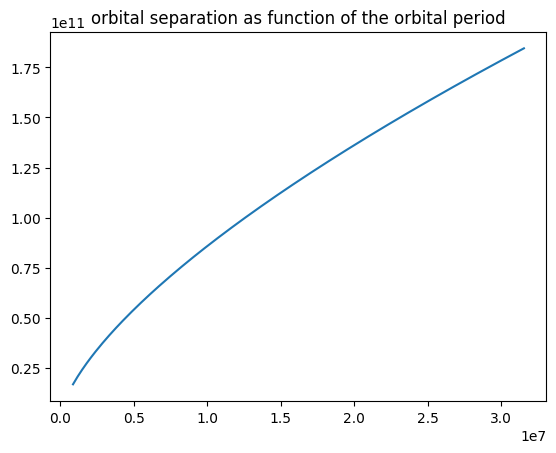

In [ ]:
P= np.linspace(10*24*3600,365*24*3600,200)
a1 = ((P**2 * G * Msum1) / (4 * (np.pi**2)))**(1/3) # en m

plt.plot(P,a1)
plt.title('orbital separation as function of the orbital period')
plt.show()